In [410]:
import numpy as np
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def get_access_token():
   response = requests.post('https://api.yelp.com/oauth2/token',
                           data={'grand_type': 'client_credentials',
                           'client_id': 'XXXXXXXXXXXXXXXXXXX',
                           'client_secret': 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'})
   return response.json()['access_token']

def get_search(loc,sor,pri,ter):
   access_token = get_access_token()
   base_url = "https://api.yelp.com/v3/businesses/search?"
   search_terms = "location=%s&categories=restaurants&sort_by=%s&price=%s&term=%s"
   response = requests.get(base_url + search_terms % (loc,sor,pri,ter),
                          headers={'Authorization': 'Bearer %s' % access_token})
   search_result = response.json()
   return search_result

In [198]:
cty=["San Francisco","Washington, dc","chicago","New York"]
rte=[4,3,2,]
list_rest=[]
for c in cty:
    for r in rte:
        restaurant = get_search(c, "rating", r,"michelin")
        for i,j in enumerate(restaurant['businesses']):
            r_dict={}
            r_dict['name']=restaurant['businesses'][i]['name']
            r_dict['rating']=restaurant['businesses'][i]['rating']
            r_dict['price']=restaurant['businesses'][i]['price']
            r_dict['review_count']=restaurant['businesses'][i]['review_count']
            r_dict['categories']=restaurant['businesses'][i]['categories']
            r_dict['id']=restaurant['businesses'][i]['id']
            r_dict['city']=restaurant['businesses'][i]['location']['city']
            list_rest.append(r_dict)
all_restaurant=pd.DataFrame(list_rest)


In [204]:
all_restaurant.shape

(196, 7)

In [205]:
all_restaurant.price=[len(x) for x in all_restaurant.price]

In [206]:
all_restaurant.categories= [x[0] for x in all_restaurant.categories]

In [207]:
all_restaurant.categories=[x['title'] for x in all_restaurant.categories]


In [208]:
all_restaurant.dtypes

categories       object
city             object
id               object
name             object
price             int64
rating          float64
review_count      int64
dtype: object

In [202]:
all_restaurant.id =all_restaurant.id.str.encode('utf-8')
all_restaurant.name =all_restaurant.name.str.encode('utf-8')

In [336]:
all_restaurant

,categories,city,id,name,price,rating,review_count,Michelin
0,Sushi Bars,San Francisco,kusakabe-san-francisco,KUSAKABE,4,4.5,488,0.0
1,American (New),San Francisco,gary-danko-san-francisco,Gary Danko,4,4.5,4609,1.0
2,Mexican,San Francisco,californios-san-francisco,Californios,4,4.5,155,1.0
3,French,San Francisco,la-folie-san-francisco,La Folie,4,4.5,1341,0.0
4,Italian,San Francisco,acquerello-san-francisco,Acquerello,4,4.5,889,2.0
5,American (New),San Francisco,benu-san-francisco-4,Benu,4,4.5,783,3.0
6,Sushi Bars,San Francisco,omakase-san-francisco,Omakase,4,4.5,161,1.0
7,Japanese,San Francisco,wako-japanese-restaurant-san-francisco,Wako Japanese Restaurant,4,4.5,288,0.0
8,French,San Francisco,keiko-à-nob-hill-san-francisco-2,Keiko à Nob Hill,4,4.5,312,1.0
9,American (New),San Francisco,lazy-bear-san-francisco-5,Lazy Bear,4,4.5,314,1.0


In [210]:
all_restaurant.to_csv("yelpRestaurants.csv")

In [582]:
w_predict=all_restaurant[all_restaurant.city=="Washington"]
w_predict=all_restaurant[all_restaurant.Michelin!=0]
w_predict.shape

(69, 8)

In [587]:
w_predict[all_restaurant.Michelin.notnull()]

/Users/freh_mac/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,categories,city,id,name,price,rating,review_count,Michelin
1,American (New),San Francisco,gary-danko-san-francisco,Gary Danko,4,4.5,4609,1.0
2,Mexican,San Francisco,californios-san-francisco,Californios,4,4.5,155,1.0
4,Italian,San Francisco,acquerello-san-francisco,Acquerello,4,4.5,889,2.0
5,American (New),San Francisco,benu-san-francisco-4,Benu,4,4.5,783,3.0
6,Sushi Bars,San Francisco,omakase-san-francisco,Omakase,4,4.5,161,1.0
8,French,San Francisco,keiko-à-nob-hill-san-francisco-2,Keiko à Nob Hill,4,4.5,312,1.0
9,American (New),San Francisco,lazy-bear-san-francisco-5,Lazy Bear,4,4.5,314,1.0
10,French,San Francisco,atelier-crenn-san-francisco,Atelier Crenn,4,4.5,540,2.0
11,American (New),San Francisco,saison-san-francisco-2,Saison,4,4.5,296,3.0
12,American (Traditional),San Francisco,spruce-san-francisco,Spruce,4,4.0,1593,1.0


In [572]:
all_restaurant.city.unique()

array([u'San Francisco', u'Sausalito', u'Washington', u'Annandale',
       u'Chicago', u'New York', u'Brooklyn', u'Long Island City',
       u'Astoria', u'Jackson Heights', u'Flushing'], dtype=object)

In [229]:
df=pd.read_csv('Mitchelin Restaurants.csv')
df=df.drop(["yelp_Average_rating","Unnamed: 5"],1)
df=df.rename(columns = {'City':'city', 'Restaurant':'name','Michelin_starrs':'Michelin_stars'})

In [230]:
df

,city,name,neighborhood,Michelin_stars
0,Chicago,42 Grams,Uptown,2.0
1,Chicago,Acadia,South Loop,2.0
2,Chicago,Alinea,Lincoln Park,3.0
3,Chicago,Blackbird,West Loop,1.0
4,Chicago,Boka,Lincoln Park,1.0
5,Chicago,Dusek's,Pilsen,1.0
6,Chicago,El Ideas,Douglas Park,1.0
7,Chicago,Elizabeth,Ravenswood,1.0
8,Chicago,Everest,Loop,1.0
9,Chicago,Goosefoot,Ravenswood,1.0


In [239]:

df=df[df.name!='Untitled']

In [330]:
df.name.value_counts(dropna=False)

Bad Saint                            2
The Royal                            2
Jaleo                                2
Boqueria                             2
Thip Khao                            2
Zaytinya                             2
Maketto                              2
Topolobampo                          1
New Malaysia                         1
Sushiko                              1
Yusho*                               1
Zoma                                 1
Nyonya                               1
Ichimura at Brushstroke              1
Del Posto                            1
Mexicosina                           1
Marlow & Sons                        1
TAC Quick                            1
Ciccio                               1
Terrapin Creek                       1
Sepia                                1
Mott Street                          1
Everest                              1
Campton Place                        1
Xixa                                 1
Maruya                   

In [259]:
L=["Bad Saint ",
"The Royal",
"Jaleo",
"Boqueria",
"Thip Khao",
"Zaytinya",
"Maketto"]
df[df.name =="Jaleo"]

,city,name,neighborhood,Michelin_stars
347,Washington DC,Jaleo,NaN,0.0
393,Washington DC,Jaleo,NaN,NaN


In [263]:
all_restaurant[all_restaurant.name=="Acadia"]

,categories,city,id,name,price,rating,review_count
108,American (New),Chicago,acadia-chicago,Acadia,4,4.0,334


In [292]:
all_restaurant.city.value_counts()

San Francisco       51
New York            50
Washington          45
Chicago             38
Brooklyn             6
Long Island City     1
Flushing             1
Astoria              1
Annandale            1
Jackson Heights      1
Sausalito            1
Name: city, dtype: int64

In [ ]:
all_restaurant['Michelin']=0
notfouned=[]

for i in range (0,len(all_restaurant)):
    try:
        all_restaurant['Michelin'].iloc[i] =df.Michelin_stars[df.name==all_restaurant.name.iloc[i]].iloc[0]
        
    except:
        notfound.append(all_restaurant.name.iloc[i])

In [322]:
all_restaurant

,categories,city,id,name,price,rating,review_count,Michelin
0,Sushi Bars,San Francisco,kusakabe-san-francisco,KUSAKABE,4,4.5,488,0.0
1,American (New),San Francisco,gary-danko-san-francisco,Gary Danko,4,4.5,4609,1.0
2,Mexican,San Francisco,californios-san-francisco,Californios,4,4.5,155,1.0
3,French,San Francisco,la-folie-san-francisco,La Folie,4,4.5,1341,0.0
4,Italian,San Francisco,acquerello-san-francisco,Acquerello,4,4.5,889,2.0
5,American (New),San Francisco,benu-san-francisco-4,Benu,4,4.5,783,3.0
6,Sushi Bars,San Francisco,omakase-san-francisco,Omakase,4,4.5,161,1.0
7,Japanese,San Francisco,wako-japanese-restaurant-san-francisco,Wako Japanese Restaurant,4,4.5,288,0.0
8,French,San Francisco,keiko-à-nob-hill-san-francisco-2,Keiko à Nob Hill,4,4.5,312,1.0
9,American (New),San Francisco,lazy-bear-san-francisco-5,Lazy Bear,4,4.5,314,1.0


In [379]:
notfound2=[]
df['categories']=np.nan
df["price"]=np.nan
df["rating"]=np.nan
df["review_count"]=np.nan
for i in range (0,len(df)):
    try:
        s =all_restaurant.name[all_restaurant.name==df.name.iloc[i]].index
        print all_restaurant.categories[s].iloc[0]
        df['categories'].iloc[i]=all_restaurant.categories[s].iloc[0]
        df["price"].iloc[i]=all_restaurant.price[s].iloc[0]
        df["rating"].iloc[i]=all_restaurant.rating[s].iloc[0]
        df["review_count"].iloc[i]=all_restaurant.review_count[s].iloc[0]
    except:
        notfound2.append(df.name.iloc[i])


/Users/freh_mac/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/freh_mac/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/freh_mac/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

American (New)
American (New)
American (New)
American (New)
French
American (New)
American (New)
Hotels
American (New)
Korean
American (New)
American (New)
American (New)
Italian
Mexican
American (New)
Italian
American (New)
French
American (New)
Mexican
American (New)
American (New)
French
Thai
American (New)
Modern European
American (New)
American (New)
American (New)
American (New)
Sushi Bars
French
Malaysian
American (New)
American (New)
Italian
American (Traditional)
Tapas/Small Plates
Portuguese
American (Traditional)
American (New)
French
Szechuan
Mexican
American (New)
French
American (New)
Bars
American (New)
American (New)
French
Korean
Japanese
French
Italian
French
American (New)
American (New)
French
Thai
Thai
Ramen
American (New)
Italian
Chinese
Thai
Asian Fusion
Tapas/Small Plates
Bars
Filipino
Mediterranean
Laotian
Greek
Italian
Laotian
Filipino
Cocktail Bars
Brasseries
Thai
Greek
Indian
Taiwanese
American (New)


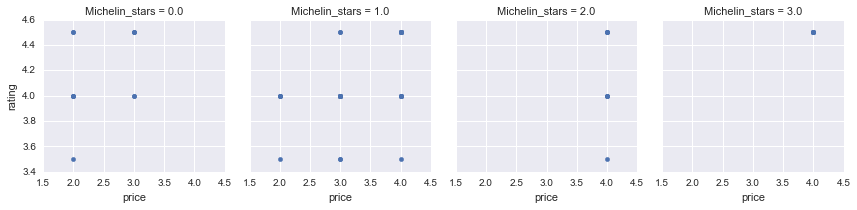

In [543]:
g = sns.FacetGrid(Michelin, col="Michelin_stars")  
g.map(plt.scatter,  "price","rating") 

In [476]:

Michelin=df.copy()
Michelin=Michelin.drop("neighborhood",axis=1)
Michelin_model=Michelin.dropna()
Michelin_predict=Michelin[(Michelin.city=="Washington DC")]
Michelin_predict=Michelin_predict[Michelin_predict.Michelin_stars!=0]
Michelin_predict=Michelin_predict.drop("Michelin_stars",axis=1)
Michelin_predict

,city,name,categories,price,rating,review_count
359,Washington DC,ANXO Cidery & Pinxtos Bar,NaN,NaN,NaN,NaN
360,Washington DC,Bindaas,NaN,NaN,NaN,NaN
361,Washington DC,Bullfrog Bagels,NaN,NaN,NaN,NaN
362,Washington DC,Casolare,NaN,NaN,NaN,NaN
363,Washington DC,District Distilling Co,NaN,NaN,NaN,NaN
364,Washington DC,Haikan,NaN,NaN,NaN,NaN
365,Washington DC,HalfSmoke,NaN,NaN,NaN,NaN
366,Washington DC,Hazel,NaN,NaN,NaN,NaN
367,Washington DC,Little Coco's,NaN,NaN,NaN,NaN
368,Washington DC,RPM Italian,Italian,3.0,4.5,131.0


In [536]:
Michelin_model.categories.unique()

array([u'American (New)', u'French', u'Hotels', u'Korean', u'Italian',
       u'Mexican', u'Thai', u'Modern European', u'Sushi Bars',
       u'Malaysian', u'American (Traditional)', u'Tapas/Small Plates',
       u'Portuguese', u'Szechuan', u'Bars', u'Japanese', u'Ramen',
       u'Chinese', u'Asian Fusion', u'Filipino', u'Mediterranean',
       u'Laotian', u'Greek'], dtype=object)

In [591]:
from sklearn import cross_validation
from sklearn.cross_validation import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

le=preprocessing.LabelEncoder()
std=StandardScaler()
X = Michelin_model[["price","rating","review_count","categories"]]
X['categories']=le.fit_transform(X.categories)
X=std.fit_transform(X)
Y = Michelin_model['Michelin_stars']
num_folds = 10
num_instances = len(X)
seed = 7
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model2))
# create the ensemble model
ensemble = VotingClassifier(estimators,voting='hard')
results = cross_validation.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())
print results


0.421428571429
[ 0.625       0.75        0.625       0.5         0.42857143  0.
  0.28571429  0.42857143  0.42857143  0.14285714]


/Users/freh_mac/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [561]:
z=Michelin_predict.dropna()
z_predict=z[["price","rating","review_count","categories"]]

z_predict['categories']=le.fit_transform(z_predict.categories)
z_predict=std.fit_transform(z_predict)

/Users/freh_mac/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [562]:
eclf1 = ensemble.fit(X, Y)
print (eclf1.predict(z_predict))

[ 1.  0.  0.  1.  1.  1.  1.  3.  1.  3.]


In [531]:
def score(name,model):
    cv = StratifiedKFold(Y, n_folds=5, shuffle=True, random_state=55)
    s = cross_validation.cross_val_score(model, X, Y, cv=cv, n_jobs=-1)
    print "{} Score:\t{:0.3} ± {:0.3}".format(name, s.mean().round(3), s.std().round(3))


In [537]:
print score("logistic",model1)
print score("CART",model2)
print score("SVM",model2)

logistic Score:	0.521 ± 0.106
None
CART Score:	0.349 ± 0.058
None
SVM Score:	0.349 ± 0.058
None


In [557]:
z

,city,name,categories,price,rating,review_count
368,Washington DC,RPM Italian,Italian,3.0,4.5,131.0
373,Washington DC,Thip Khao,Laotian,2.0,4.5,461.0
374,Washington DC,Bad Saint,Filipino,2.0,4.5,194.0
376,Washington DC,Tail Up Goat,Cocktail Bars,3.0,4.5,129.0
383,Washington DC,Le Diplomate,Brasseries,3.0,4.0,1746.0
385,Washington DC,Little Serow,Thai,3.0,4.0,494.0
390,Washington DC,Zaytinya,Greek,3.0,4.0,3312.0
395,Washington DC,Rasika,Indian,3.0,4.5,2231.0
398,Washington DC,Toki Underground,Taiwanese,2.0,4.0,1581.0
401,Washington DC,Rose's Luxury,American (New),3.0,4.5,1231.0


In [563]:
z['predicted']=eclf1.predict(z_predict)

/Users/freh_mac/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [595]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100) # initialize
rf.fit(X, Y) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [596]:
rf.predict(z_predict)

array([ 1.,  0.,  0.,  1.,  1.,  1.,  1.,  3.,  1.,  3.])

In [606]:
z[['name','predicted']].to_csv("submission")

,name,predicted
368,RPM Italian,1.0
373,Thip Khao,0.0
374,Bad Saint,0.0
376,Tail Up Goat,1.0
383,Le Diplomate,1.0
385,Little Serow,1.0
390,Zaytinya,1.0
395,Rasika,3.0
398,Toki Underground,1.0
401,Rose's Luxury,3.0
